In [58]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.cluster import KMeans
from sklearn_extra.cluster import KMedoids
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import silhouette_score

In [59]:
df = pd.read_csv("Data\\Human activity.csv").drop("subject", axis=1)
activities = df["Activity"]
inputs = df.drop("Activity", axis=1)
inputs.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,0.414503,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,0.404573,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.087753,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892


KMeans Inertia for K=3: 2081878


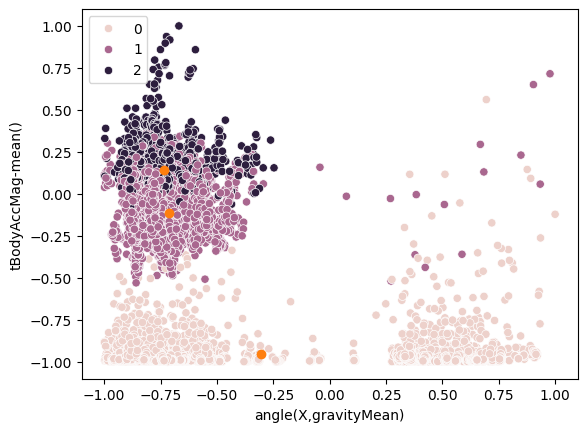

In [60]:
KMeans_model_3 = make_pipeline(StandardScaler(), KMeans(n_clusters=3, random_state=18))
KMeans_model_3.fit(inputs)
predictions_3 = KMeans_model_3.predict(inputs)
scatter = sns.scatterplot(inputs, x="angle(X,gravityMean)", y="tBodyAccMag-mean()", hue=predictions_3)
means_3 = KMeans_model_3[0].inverse_transform(KMeans_model_3[1].cluster_centers_)
print("KMeans Inertia for K=3: {:.0f}".format(KMeans_model_3[1].inertia_))
scatter.scatter(means_3[:,inputs.columns.get_loc("angle(X,gravityMean)")], means_3[:, inputs.columns.get_loc("tBodyAccMag-mean()")])

KMeans Inertia for K=5: 1935886


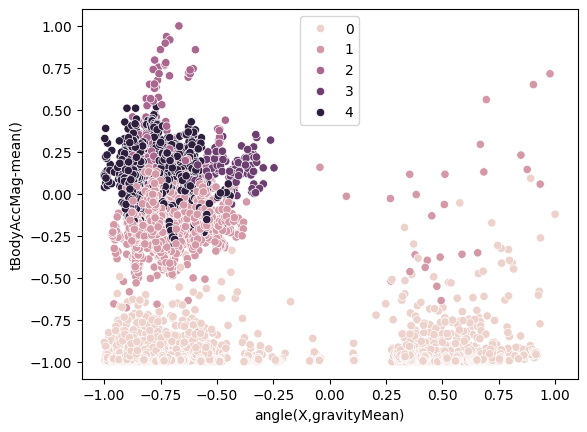

In [61]:
KMeans_model_5 = make_pipeline(StandardScaler(), KMeans(n_clusters=5, random_state=18))
KMeans_model_5.fit(inputs)
predictions_5 = KMeans_model_5.predict(inputs)
print("KMeans Inertia for K=5: {:.0f}".format(KMeans_model_5[1].inertia_))
scatter = sns.scatterplot(inputs, x="angle(X,gravityMean)", y="tBodyAccMag-mean()", hue=predictions_5)

KMeans Inertia for K=10: 1661676


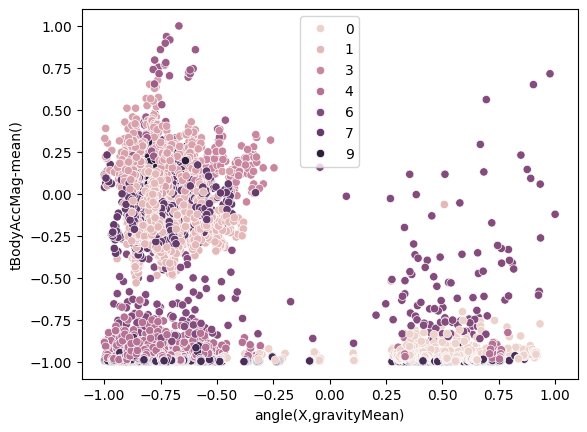

In [62]:
KMeans_model_10 = make_pipeline(StandardScaler(), KMeans(n_clusters=10, random_state=18))
KMeans_model_10.fit(inputs)
predictions_10 = KMeans_model_10.predict(inputs)
print("KMeans Inertia for K=10: {:.0f}".format(KMeans_model_10[1].inertia_))
scatter = sns.scatterplot(inputs, x="angle(X,gravityMean)", y="tBodyAccMag-mean()", hue=predictions_10)

Text(0, 0.5, 'Inertia')

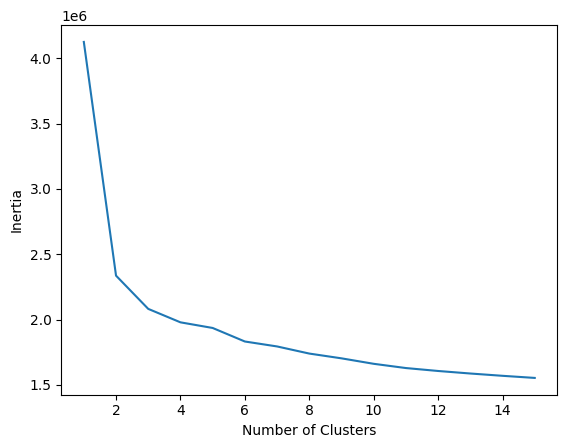

In [63]:
inertias = [0]*15
for i in range(1,16):
    model = make_pipeline(StandardScaler(), KMeans(n_clusters=i, random_state=18))
    model.fit(inputs)
    inertias[i-1] = model[1].inertia_
to_plot = pd.DataFrame(inertias)
to_plot.index += 1
plot = sns.lineplot(to_plot, legend=None)
plot.set_xlabel("Number of Clusters")
plot.set_ylabel("Inertia")

KMediods Inertia for K=3: 134325


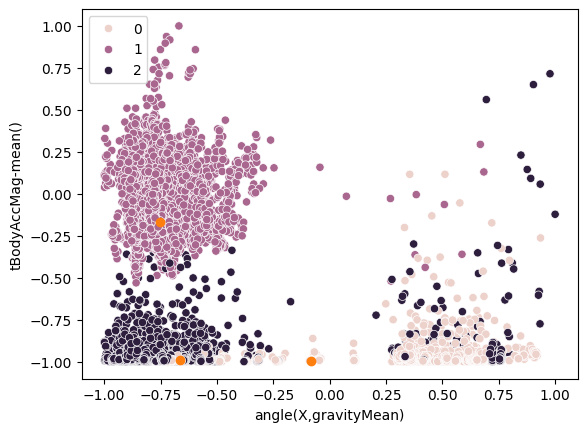

In [64]:
KMeds_model_3 = make_pipeline(StandardScaler(), KMedoids(n_clusters=3, random_state=18))
KMeds_model_3.fit(inputs)
predictions_3_med = KMeds_model_3.predict(inputs)
scatter = sns.scatterplot(inputs, x="angle(X,gravityMean)", y="tBodyAccMag-mean()", hue=predictions_3_med)
means_3_med = KMeds_model_3[0].inverse_transform(KMeds_model_3[1].cluster_centers_)
print("KMediods Inertia for K=3: {:.0f}".format(KMeds_model_3[1].inertia_))
scatter.scatter(means_3_med[:,inputs.columns.get_loc("angle(X,gravityMean)")], means_3_med[:, inputs.columns.get_loc("tBodyAccMag-mean()")])

KMediods Inertia for K=5: 133945


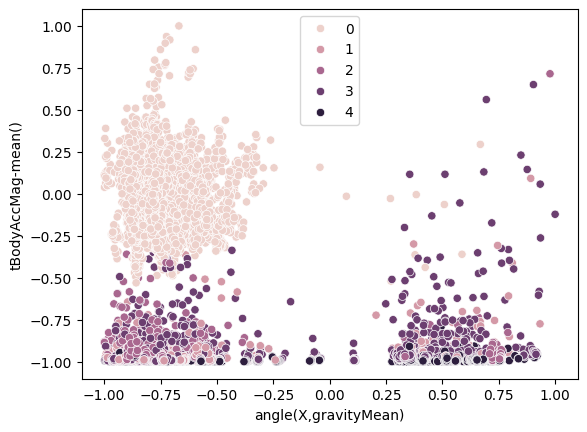

In [65]:
KMeds_model_5 = make_pipeline(StandardScaler(), KMedoids(n_clusters=5, random_state=18)) 
KMeds_model_5.fit(inputs)
predictions_5_med = KMeds_model_5.predict(inputs)
print("KMediods Inertia for K=5: {:.0f}".format(KMeds_model_5[1].inertia_))
scatter = sns.scatterplot(inputs, x="angle(X,gravityMean)", y="tBodyAccMag-mean()", hue=predictions_5_med)

KMediods Inertia for K=10: 134325


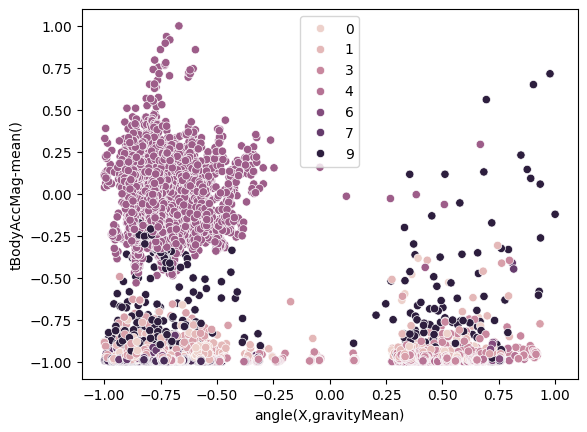

In [66]:
KMeds_model_10 = make_pipeline(StandardScaler(), KMedoids(n_clusters=10, random_state=18))
KMeds_model_10.fit(inputs)
predictions_10_med = KMeds_model_10.predict(inputs)
print("KMediods Inertia for K=10: {:.0f}".format(KMeds_model_3[1].inertia_))
scatter = sns.scatterplot(inputs, x="angle(X,gravityMean)", y="tBodyAccMag-mean()", hue=predictions_10_med)

Text(0, 0.5, 'Inertia')

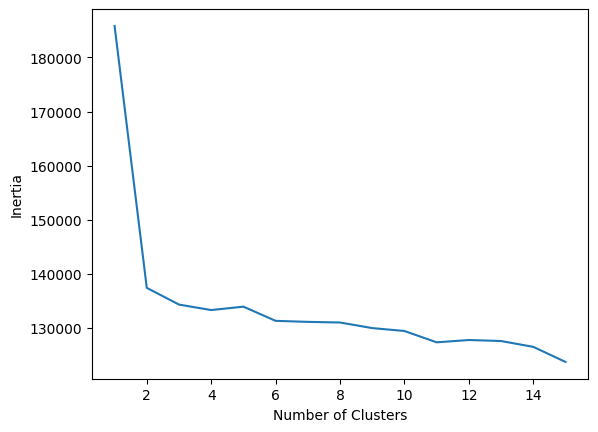

In [67]:
inertias_med = [0]*15
for i in range(1,16):
    model = make_pipeline(StandardScaler(), KMedoids(n_clusters=i, random_state=18))
    model.fit(inputs)
    inertias_med[i-1] = model[1].inertia_
to_plot = pd.DataFrame(inertias_med)
to_plot.index += 1
plot = sns.lineplot(to_plot, legend=None)
plot.set_xlabel("Number of Clusters")
plot.set_ylabel("Inertia")

In [68]:
scores_med = []
scores_mean = []
for i in range(2,16):
    model_med = make_pipeline(StandardScaler(), KMedoids(n_clusters=i, random_state=18))
    model_mean = make_pipeline(StandardScaler(), KMeans(n_clusters=i, random_state=18))
    model_med.fit(inputs)
    model_mean.fit(inputs)
    scores_med.append(silhouette_score(inputs, model_med.predict(inputs)))
    scores_mean.append(silhouette_score(inputs, model_mean.predict(inputs)))
scores = pd.DataFrame({"KMedian":scores_med, "KMeans":scores_mean})
scores.index += 2

Text(0, 0.5, 'Silhouette Score')

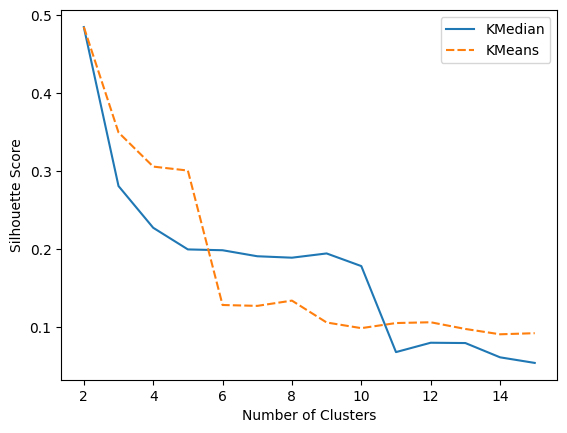

In [69]:
plot = sns.lineplot(scores)
plot.set_xlabel("Number of Clusters")
plot.set_ylabel("Silhouette Score")